## install mujoco-py and D4RL

* **Restart Runtime** after running this block to complete D4RL setup


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

###### libs for install ######


!sudo apt-get update
!sudo apt-get install gcc

!sudo apt-get build-dep mesa
!sudo apt-get install llvm-dev
!sudo apt-get install freeglut3 freeglut3-dev

!sudo apt-get install python3-dev

!sudo apt-get install build-essential

!sudo apt install curl git libgl1-mesa-dev libgl1-mesa-glx libglew-dev \
        libosmesa6-dev software-properties-common net-tools unzip vim \
        virtualenv wget xpra xserver-xorg-dev libglfw3-dev patchelf

#!sudo apt-get install -y libglew-dev



Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 340 kB in 2s (161 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
gcc is already the newest version 

In [3]:
%ls

drive/  sample_data/


In [4]:

###### mujoco setup ######


#!wget https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz

!wget https://roboti.us/download/mujoco200_linux.zip

!wget https://roboti.us/file/mjkey.txt


--2023-05-02 18:33:24--  https://roboti.us/download/mujoco200_linux.zip
Resolving roboti.us (roboti.us)... 104.40.85.93
Connecting to roboti.us (roboti.us)|104.40.85.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4427362 (4.2M) [application/zip]
Saving to: ‘mujoco200_linux.zip’

mujoco200_linux.zip 100%[===================>]   4.22M  1.76MB/s    in 2.4s    

2023-05-02 18:33:27 (1.76 MB/s) - ‘mujoco200_linux.zip’ saved [4427362/4427362]

--2023-05-02 18:33:27--  https://roboti.us/file/mjkey.txt
Resolving roboti.us (roboti.us)... 104.40.85.93
Connecting to roboti.us (roboti.us)|104.40.85.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 768 [text/plain]
Saving to: ‘mjkey.txt’

mjkey.txt           100%[===================>]     768  --.-KB/s    in 0s      

2023-05-02 18:33:28 (38.1 MB/s) - ‘mjkey.txt’ saved [768/768]



In [5]:

!mkdir /root/.mujoco

### mujoco 210
#!tar -xf mujoco210-linux-x86_64.tar.gz -C /.mujoco/
#!ls -alh /.mujoco/mujoco210

### mujoco 200
!unzip mujoco200_linux.zip -d /root/.mujoco/
!cp -r /root/.mujoco/mujoco200_linux /root/.mujoco/mujoco200

!mv mjkey.txt /root/.mujoco/

!cp -r /root/.mujoco/mujoco200/bin/* /usr/lib/



Archive:  mujoco200_linux.zip
   creating: /root/.mujoco/mujoco200_linux/
   creating: /root/.mujoco/mujoco200_linux/sample/
  inflating: /root/.mujoco/mujoco200_linux/sample/mjxmake.m  
  inflating: /root/.mujoco/mujoco200_linux/sample/makefile  
  inflating: /root/.mujoco/mujoco200_linux/sample/mjx.cpp  
  inflating: /root/.mujoco/mujoco200_linux/sample/simulate.cpp  
  inflating: /root/.mujoco/mujoco200_linux/sample/record.cpp  
  inflating: /root/.mujoco/mujoco200_linux/sample/basic.cpp  
  inflating: /root/.mujoco/mujoco200_linux/sample/derivative.cpp  
  inflating: /root/.mujoco/mujoco200_linux/sample/compile.cpp  
  inflating: /root/.mujoco/mujoco200_linux/sample/testspeed.cpp  
  inflating: /root/.mujoco/mujoco200_linux/sample/testxml.cpp  
   creating: /root/.mujoco/mujoco200_linux/model/
  inflating: /root/.mujoco/mujoco200_linux/model/sponge.png  
  inflating: /root/.mujoco/mujoco200_linux/model/softellipsoid.xml  
  inflating: /root/.mujoco/mujoco200_linux/model/softcylinde

In [6]:

!ls -alh /root/.mujoco/


total 24K
drwxr-xr-x 4 root root 4.0K May  2 18:33 .
drwx------ 1 root root 4.0K May  2 18:33 ..
-rw-r--r-- 1 root root  768 Oct 18  2021 mjkey.txt
drwxr-xr-x 7 root root 4.0K May  2 18:33 mujoco200
drwxrwxr-x 7 root root 4.0K Oct  2  2018 mujoco200_linux


In [7]:

%env LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin


env: LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin


In [8]:

###### mujoco-py setup ######

!pip install mujoco_py==2.0.2.8



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.8/207.8 kB 31.8 MB/s eta 0:00:00


In [9]:

###### D4RL setup ######

## !pip uninstall dm_control==0.0.364896371

!git clone https://github.com/rail-berkeley/d4rl.git

### edit dm_control version in d4rl setup.py
!sed -i "s;dm_control @ git+git://github.com/deepmind/dm_control@master#egg=dm_control;dm_control==0.0.364896371;g" /content/d4rl/setup.py

### edit mjrl install in d4rl setup.py to use github's new https protocol instead of git SSH
!sed -i "s;mjrl @ git+git://github.com/aravindr93/mjrl@master#egg=mjrl;mjrl @ git+https://github.com/aravindr93/mjrl@master#egg=mjrl;g" /content/d4rl/setup.py

!pip install -e d4rl/.




Cloning into 'd4rl'...
remote: Enumerating objects: 1373, done.
remote: Counting objects: 100% (598/598), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 1373 (delta 317), reused 391 (delta 284), pack-reused 775
Receiving objects: 100% (1373/1373), 28.57 MiB | 16.98 MiB/s, done.
Resolving deltas: 100% (673/673), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/d4rl
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/aravindr93/mjrl (to revision master) to /tmp/pip-install-16bcfzmh/mjrl_0f4f79d091ff4291a75d8e5a6e2f5d46
  Running command git clone --filter=blob:none --quiet https://github.com/aravindr93/mjrl /tmp/pip-install-16bcfzmh/mjrl_0f4f79d091ff4291a75d8e5a6e2f5d46
  Resolved https://github.com/aravindr93/mjrl to commit 3871d93763d3b49c4741e6daeaebbc605fe140dc
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.2/626.2 kB 49

In [10]:

###### restart runtime ######

exit()


# check mujoco-py and D4RL installation

* if check fails then **Restart Runtime** again
* if check still fails then Factory reset runtime and install again
* After installing, first import will be slow as the lib will be built again


In [1]:
%ls

d4rl/  drive/  mujoco200_linux.zip  sample_data/


In [2]:
# set mujoco env path if not already set
%env LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin

import gym
import d4rl # Import required to register environments


env = gym.make('Walker2d-v3')
env.reset()
env.step(env.action_space.sample())
env.close()
print("mujoco-py check passed")

# env = gym.make('walker2d-medium-v2')
# env.reset()
# env.step(env.action_space.sample())
# env.close()
# print("d4rl check passed")


env: LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin


/usr/local/lib/python3.10/dist-packages/mujoco_py/builder.py:9: DeprecationWarning: The distutils.sysconfig module is deprecated, use sysconfig instead
  from distutils.sysconfig import customize_compiler


Compiling /usr/local/lib/python3.10/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.10/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.8_310_linuxcpuextensionbuilder
creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.8_310_linuxcpuextensionbuilder/temp.linux-x86_64-3.10
creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.8_310_linuxcpuextensionbuilder/temp.linux-x86_64-3.10/usr
creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.8_310_linuxcpuextensionbuilder/temp.linux-x86_64-3.10/usr/local
creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.8_310_linuxcpuextensionbuilder/temp.linux-x86_64-3.10/usr/local/lib
creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.8_310_l

<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


mujoco-py check passed


No module named 'flow'
/usr/local/lib/python3.10/dist-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
No module named 'carla'


WORKING WITH OUR OWN DATA

In [3]:
import numpy as np
# a_h = np.load("/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/data_100k/RandomHopper-v0_n100000_actions.npy")
# ns_h = np.load("/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/data_100k/RandomHopper-v0_n100000_nextobservations.npy")
# s_h = np.load("/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/data_100k/RandomHopper-v0_n100000_observations.npy")
# r_h = np.load("/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/data_100k/RandomHopper-v0_n100000_rewards.npy")
# t_h = np.load("/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/data_100k/RandomHopper-v0_n100000_terminals.npy")
a_h = np.load("/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/uni_model_5M/RandomHopper-v0_n5000000_actions.npy")
ns_h = np.load("/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/uni_model_5M/RandomHopper-v0_n5000000_nextobservations.npy")
s_h = np.load("/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/uni_model_5M/RandomHopper-v0_n5000000_observations.npy")
r_h = np.load("/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/uni_model_5M/RandomHopper-v0_n5000000_rewards.npy")
t_h = np.load("/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/uni_model_5M/RandomHopper-v0_n5000000_terminals.npy")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
print("a_h shape: ",a_h.shape)
print("state shape: ",ns_h.shape)
print("next state shape: ",s_h.shape)
print("rewards shape: ",r_h.shape)
print("terminal shape: ",t_h.shape)

a_h shape:  (5000000, 3)
state shape:  (5000000, 11)
next state shape:  (5000000, 11)
rewards shape:  (5000000,)
terminal shape:  (5000000,)


# download D4RL data

*   skip this block if data is already downloaded



In [ ]:
%ls

d4rl/  drive/  mujoco200_linux.zip  sample_data/


In [ ]:
%env LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin

import os
import gym
import numpy as np

import collections
import pickle
data_dir = "/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/uni_model_5M"
# data_dir = "/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/data_100k"
name = "hopper_data_set"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
pkl_file_path = os.path.join(data_dir, name)

print("processing: ", name)

dataset = {"observations":s_h,"rewards":r_h,"next_observations":ns_h,"terminals":t_h,"actions":a_h}

N = dataset["rewards"].shape[0]
data_ = collections.defaultdict(list)

use_timeouts = False
episode_step = 0
paths = []
for i in range(N):
    done_bool = bool(dataset['terminals'][i])
    if use_timeouts:
        final_timestep = dataset['timeouts'][i]
    else:
        final_timestep = (episode_step == 1000-1)
    for k in ['observations', 'next_observations', 'actions', 'rewards', 'terminals']:
        data_[k].append(dataset[k][i])
    if done_bool or final_timestep:
        episode_step = 0
        episode_data = {}
        for k in data_:
            episode_data[k] = np.array(data_[k])
        paths.append(episode_data)
        data_ = collections.defaultdict(list)
    episode_step += 1

returns = np.array([np.sum(p['rewards']) for p in paths])
num_samples = np.sum([p['rewards'].shape[0] for p in paths])
print(f'Number of samples collected: {num_samples}')
print(f'Trajectory returns: mean = {np.mean(returns)}, std = {np.std(returns)}, max = {np.max(returns)}, min = {np.min(returns)}')

with open(f'{pkl_file_path}.pkl', 'wb') as f:
    pickle.dump(paths, f)

env: LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin
processing:  hopper_data_set
Number of samples collected: 5000000
Trajectory returns: mean = 223.40768654666797, std = 7.593039544796582, max = 243.1550490005306, min = 170.9372911709533


In [ ]:
# %env LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin

# import os
# import gym
# import numpy as np

# import collections
# import pickle
# data_dir = "/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/data_100k"
# name = "hopper_data_set"
# if not os.path.exists(data_dir):
#     os.makedirs(data_dir)
# pkl_file_path = os.path.join(data_dir, name)

# print("processing: ", name)

# dataset = {"observations":s_h,"rewards":r_h,"next_observations":ns_h,"terminals":t_h,"actions":a_h}

# N = dataset["rewards"].shape[0]
# data_ = collections.defaultdict(list)

# use_timeouts = False
# episode_step = 0
# paths = []
# for i in range(N):
#     done_bool = bool(dataset['terminals'][i])
#     if use_timeouts:
#         final_timestep = dataset['timeouts'][i]
#     else:
#         final_timestep = (episode_step == 1000-1)
#     for k in ['observations', 'next_observations', 'actions', 'rewards', 'terminals']:
#         data_[k].append(dataset[k][i])
#     if done_bool or final_timestep:
#         episode_step = 0
#         episode_data = {}
#         for k in data_:
#             episode_data[k] = np.array(data_[k])
#         paths.append(episode_data)
#         data_ = collections.defaultdict(list)
#     episode_step += 1

# returns = np.array([np.sum(p['rewards']) for p in paths])
# num_samples = np.sum([p['rewards'].shape[0] for p in paths])
# print(f'Number of samples collected: {num_samples}')
# print(f'Trajectory returns: mean = {np.mean(returns)}, std = {np.std(returns)}, max = {np.max(returns)}, min = {np.min(returns)}')

# with open(f'{pkl_file_path}.pkl', 'wb') as f:
#     pickle.dump(paths, f)




env: LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin
processing:  hopper_data_set
Number of samples collected: 100000
Trajectory returns: mean = 1737.6921673939023, std = 7.864892818484651, max = 1756.5564406375825, min = 1720.746834586841


# import libs


In [5]:

# set mujoco env path if not already set
%env LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin

import os
import sys
import random
import csv
from datetime import datetime
import pickle
import collections
import math

import numpy as np
import gym

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader



env: LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin


# training parameters

In [6]:

# dataset = "medium"       # medium / medium-replay / medium-expert
rtg_scale = 1000                # scale to normalize returns to go

# use v3 env for evaluation because
# DT paper evaluates results on v3 envs

# env_name = 'Walker2d-v3'
# rtg_target = 5000
# env_d4rl_name = f'walker2d-{dataset}-v2'

# env_name = 'HalfCheetah-v3'
# rtg_target = 6000
# env_d4rl_name = f'halfcheetah-{dataset}-v2'

# env_name = 'Hopper-v3'
env_name = "RandomHopper-v0"
rtg_target = 3000
# env_d4rl_name = f'hopper-{dataset}-v2'


max_eval_ep_len = 1000      # max len of one evaluation episode
num_eval_ep = 10            # num of evaluation episodes per iteration

batch_size = 64             # training batch size
lr = 1e-4                   # learning rate
wt_decay = 1e-4             # weight decay
warmup_steps = 10000        # warmup steps for lr scheduler

# total updates = max_train_iters x num_updates_per_iter
max_train_iters = 100
num_updates_per_iter = 100

context_len = 30        # K in decision transformer #init=30
n_blocks = 12            # num of transformer blocks #init = 3
embed_dim = 128         # embedding (hidden) dim of transformer
n_heads = 1             # num of transformer heads #init=1
dropout_p = 0.1         # dropout probability



# load data from this file
# dataset_path = "/content/data/hopper_data_set.pkl"
dataset_path = "/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/uni_model_5M/hopper_data_set.pkl"

# saves model and csv in this directory
log_dir = "/content/drive/MyDrive/Romil/rl_project/dt_runs/"


if not os.path.exists(log_dir):
    os.makedirs(log_dir)


# training and evaluation device
device_name = 'cuda'
device = torch.device(device_name)
print("device set to: ", device)



device set to:  cuda


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# decision transformer model

In [7]:

"""
this extremely minimal GPT model is based on:
Misha Laskin's tweet: 
https://twitter.com/MishaLaskin/status/1481767788775628801?cxt=HHwWgoCzmYD9pZApAAAA

and its corresponding notebook:
https://colab.research.google.com/drive/1NUBqyboDcGte5qAJKOl8gaJC28V_73Iv?usp=sharing

the above colab has a bug while applying masked_fill which is fixed in the
following code

"""

class MaskedCausalAttention(nn.Module):
    def __init__(self, h_dim, max_T, n_heads, drop_p):
        super().__init__()

        self.n_heads = n_heads
        self.max_T = max_T

        self.q_net = nn.Linear(h_dim, h_dim)
        self.k_net = nn.Linear(h_dim, h_dim)
        self.v_net = nn.Linear(h_dim, h_dim)

        self.proj_net = nn.Linear(h_dim, h_dim)

        self.att_drop = nn.Dropout(drop_p)
        self.proj_drop = nn.Dropout(drop_p)

        ones = torch.ones((max_T, max_T))
        mask = torch.tril(ones).view(1, 1, max_T, max_T)

        # register buffer makes sure mask does not get updated
        # during backpropagation
        self.register_buffer('mask',mask)

    def forward(self, x):
        B, T, C = x.shape # batch size, seq length, h_dim * n_heads

        N, D = self.n_heads, C // self.n_heads # N = num heads, D = attention dim

        # rearrange q, k, v as (B, N, T, D)
        q = self.q_net(x).view(B, T, N, D).transpose(1,2)
        k = self.k_net(x).view(B, T, N, D).transpose(1,2)
        v = self.v_net(x).view(B, T, N, D).transpose(1,2)

        # weights (B, N, T, T)
        weights = q @ k.transpose(2,3) / math.sqrt(D)
        # causal mask applied to weights
        weights = weights.masked_fill(self.mask[...,:T,:T] == 0, float('-inf'))
        # normalize weights, all -inf -> 0 after softmax
        normalized_weights = F.softmax(weights, dim=-1)

        # attention (B, N, T, D)
        attention = self.att_drop(normalized_weights @ v)

        # gather heads and project (B, N, T, D) -> (B, T, N*D)
        attention = attention.transpose(1, 2).contiguous().view(B,T,N*D)

        out = self.proj_drop(self.proj_net(attention))
        return out


class Block(nn.Module):
    def __init__(self, h_dim, max_T, n_heads, drop_p):
        super().__init__()
        self.attention = MaskedCausalAttention(h_dim, max_T, n_heads, drop_p)
        self.mlp = nn.Sequential(
                nn.Linear(h_dim, 4*h_dim),
                nn.GELU(),
                nn.Linear(4*h_dim, h_dim),
                nn.Dropout(drop_p),
            )
        self.ln1 = nn.LayerNorm(h_dim)
        self.ln2 = nn.LayerNorm(h_dim)

    def forward(self, x):
        # Attention -> LayerNorm -> MLP -> LayerNorm
        x = x + self.attention(x) # residual
        x = self.ln1(x)
        x = x + self.mlp(x) # residual
        x = self.ln2(x)
        return x


class DecisionTransformer(nn.Module):
    def __init__(self, state_dim, act_dim, n_blocks, h_dim, context_len, 
                 n_heads, drop_p, max_timestep=4096):
        super().__init__()

        self.state_dim = state_dim
        self.act_dim = act_dim
        self.h_dim = h_dim

        ### transformer blocks
        input_seq_len = 3 * context_len
        blocks = [Block(h_dim, input_seq_len, n_heads, drop_p) for _ in range(n_blocks)]
        self.transformer = nn.Sequential(*blocks)

        ### projection heads (project to embedding)
        self.embed_ln = nn.LayerNorm(h_dim)
        self.embed_timestep = nn.Embedding(max_timestep, h_dim)
        self.embed_rtg = torch.nn.Linear(1, h_dim)
        self.embed_state = torch.nn.Linear(state_dim, h_dim)
        
        # # discrete actions
        # self.embed_action = torch.nn.Embedding(act_dim, h_dim)
        # use_action_tanh = False # False for discrete actions

        # continuous actions
        self.embed_action = torch.nn.Linear(act_dim, h_dim)
        use_action_tanh = True # True for continuous actions
        
        ### prediction heads
        self.predict_rtg = torch.nn.Linear(h_dim, 1)
        self.predict_state = torch.nn.Linear(h_dim, state_dim)
        self.predict_action = nn.Sequential(
            *([nn.Linear(h_dim, act_dim)] + ([nn.Tanh()] if use_action_tanh else []))
        )


    def forward(self, timesteps, states, actions, returns_to_go):

        B, T, _ = states.shape

        time_embeddings = self.embed_timestep(timesteps)

        # time embeddings are treated similar to positional embeddings
        # print("self.embed_state(states): ", type(self.embed_state(states)))
        # print("self.embed_state(states): ", self.embed_state(states))
        # print("\n")
        # print("time_embeddings: ", type(time_embeddings))
        # print(time_embeddings)

        state_embeddings = self.embed_state(states) + time_embeddings
        action_embeddings = self.embed_action(actions) + time_embeddings
        returns_embeddings = self.embed_rtg(returns_to_go) + time_embeddings

        # stack rtg, states and actions and reshape sequence as
        # (r1, s1, a1, r2, s2, a2 ...)
        h = torch.stack(
            (returns_embeddings, state_embeddings, action_embeddings), dim=1
        ).permute(0, 2, 1, 3).reshape(B, 3 * T, self.h_dim)

        h = self.embed_ln(h)
        
        # transformer and prediction
        h = self.transformer(h)

        # get h reshaped such that its size = (B x 3 x T x h_dim) and
        # h[:, 0, t] is conditioned on r_0, s_0, a_0 ... r_t
        # h[:, 1, t] is conditioned on r_0, s_0, a_0 ... r_t, s_t
        # h[:, 2, t] is conditioned on r_0, s_0, a_0 ... r_t, s_t, a_t
        h = h.reshape(B, T, 3, self.h_dim).permute(0, 2, 1, 3)

        # get predictions
        return_preds = self.predict_rtg(h[:,2])     # predict next rtg given r, s, a
        state_preds = self.predict_state(h[:,2])    # predict next state given r, s, a
        action_preds = self.predict_action(h[:,1])  # predict action given r, s
    
        return state_preds, action_preds, return_preds




In [8]:
s_h.shape

(5000000, 11)

In [9]:
np.std(s_h,axis=0)

array([0.22517713, 0.0731863 , 0.24863816, 0.24900581, 0.5444387 ,
       0.74092607, 1.57216209, 1.48006045, 3.0442172 , 4.08570568,
       6.93709039])

In [10]:
np.mean(s_h,axis=0)

array([ 1.33847207, -0.05317279, -0.1694057 , -0.32107678,  0.38387612,
        1.0360014 ,  0.44782853, -0.22914771,  0.01478697,  0.01261169,
        0.90096138])

infos modified

In [11]:
REF_MAX_SCORE = {
    'hopper' : 1760,
}
REF_MIN_SCORE = {
    'hopper' : -50,
}

D4RL_DATASET_STATS = {
        'hopper': {
                'state_mean':list(np.mean(s_h,axis=0)),
                'state_std':list(np.std(s_h,axis=0))
            }
}



# utils

In [12]:


def discount_cumsum(x, gamma):
    disc_cumsum = np.zeros_like(x)
    disc_cumsum[-1] = x[-1]
    for t in reversed(range(x.shape[0]-1)):
        disc_cumsum[t] = x[t] + gamma * disc_cumsum[t+1]
    return disc_cumsum


def get_d4rl_dataset_stats():
    return D4RL_DATASET_STATS['hopper']


def get_d4rl_normalized_score(score):
    return (score - REF_MIN_SCORE['hopper']) / (REF_MAX_SCORE['hopper'] - REF_MIN_SCORE['hopper'])
    
    
def evaluate_on_env(model, device, context_len, env, rtg_target, rtg_scale,
                    num_eval_ep=10, max_test_ep_len=1000,
                    state_mean=None, state_std=None, render=False):

    eval_batch_size = 1  # required for forward pass

    results = {}
    total_reward = 0
    total_timesteps = 0

    state_dim = env.observation_space.shape[0]
    act_dim = env.action_space.shape[0]

    if state_mean is None:
        state_mean = torch.zeros((state_dim,)).to(device)
    else:
        state_mean = torch.from_numpy(state_mean).to(device)
        
    if state_std is None:
        state_std = torch.ones((state_dim,)).to(device)
    else:
        state_std = torch.from_numpy(state_std).to(device)

    # same as timesteps used for training the transformer
    # also, crashes if device is passed to arange()
    timesteps = torch.arange(start=0, end=max_test_ep_len, step=1)
    timesteps = timesteps.repeat(eval_batch_size, 1).to(device)

    model.eval()

    with torch.no_grad():

        for _ in range(num_eval_ep):

            # zeros place holders
            actions = torch.zeros((eval_batch_size, max_test_ep_len, act_dim),
                                dtype=torch.float32, device=device)

            states = torch.zeros((eval_batch_size, max_test_ep_len, state_dim),
                                dtype=torch.float32, device=device)
            
            rewards_to_go = torch.zeros((eval_batch_size, max_test_ep_len, 1),
                                dtype=torch.float32, device=device)
            
            # init episode
            running_state = env.reset()
            running_reward = 0
            running_rtg = rtg_target / rtg_scale

            for t in range(max_test_ep_len):

                total_timesteps += 1

                # add state in placeholder and normalize
                states[0, t] = torch.from_numpy(running_state).to(device)
                states[0, t] = (states[0, t] - state_mean) / state_std

                # calcualate running rtg and add in placeholder
                running_rtg = running_rtg - (running_reward / rtg_scale)
                rewards_to_go[0, t] = running_rtg

                if t < context_len:
                    _, act_preds, _ = model.forward(timesteps[:,:context_len],
                                                states[:,:context_len],
                                                actions[:,:context_len],
                                                rewards_to_go[:,:context_len])
                    act = act_preds[0, t].detach()
                else:
                    _, act_preds, _ = model.forward(timesteps[:,t-context_len+1:t+1],
                                                states[:,t-context_len+1:t+1],
                                                actions[:,t-context_len+1:t+1],
                                                rewards_to_go[:,t-context_len+1:t+1])
                    act = act_preds[0, -1].detach()


                running_state, running_reward, done, _ = env.step(act.cpu().numpy())

                # add action in placeholder
                actions[0, t] = act

                total_reward += running_reward

                if render:
                    env.render()
                if done:
                    break

    results['eval/avg_reward'] = total_reward / num_eval_ep
    results['eval/avg_ep_len'] = total_timesteps / num_eval_ep
    
    return results



# dataset

In [13]:
D4RL_DATASET_STATS

{'hopper': {'state_mean': [1.3384720667220606,
   -0.053172794629437616,
   -0.16940570415887762,
   -0.32107677721929767,
   0.38387611949310746,
   1.036001398303527,
   0.4478285253173514,
   -0.22914770984913804,
   0.014786974618684673,
   0.012611690654025814,
   0.9009613782290813],
  'state_std': [0.22517712835903875,
   0.07318629863138805,
   0.24863815893850966,
   0.24900580785911905,
   0.544438704864551,
   0.7409260707317497,
   1.572162090117725,
   1.4800604509337945,
   3.044217203406061,
   4.085705681831229,
   6.937090393207738]}}

In [14]:
%ls

d4rl/  drive/  dt_runs/  mujoco200_linux.zip  sample_data/


In [15]:
## check data
env_d4rl_name = 'hopper'
# load dataset
with open(dataset_path, 'rb') as f:
    trajectories = pickle.load(f)

min_len = 10**4
max_len = 10**2
states = []
for traj in trajectories:
    min_len = min(min_len, traj['observations'].shape[0])
    max_len = max(max_len, traj['observations'].shape[0])
    states.append(traj['observations'])

# used for input normalization
states = np.concatenate(states, axis=0)
state_mean, state_std = np.mean(states, axis=0), np.std(states, axis=0) + 1e-6

print(dataset_path)
print("num of trajectories in dataset: ", len(trajectories))
print("minimum trajectory length in dataset: ", min_len)
print("maximum trajectory length in dataset: ", max_len)
print("state mean: ", state_mean.tolist())
print("state std: ", state_std.tolist())


## check if info is correct
print("is state mean info correct: ", state_mean.tolist() == D4RL_DATASET_STATS[env_d4rl_name]['state_mean'])
print("is state std info correct: ", state_std.tolist() == D4RL_DATASET_STATS[env_d4rl_name]['state_std'])




/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/uni_model_5M/hopper_data_set.pkl
num of trajectories in dataset:  45578
minimum trajectory length in dataset:  101
maximum trajectory length in dataset:  115
state mean:  [1.3384720667220606, -0.053172794629437616, -0.16940570415887762, -0.32107677721929767, 0.38387611949310746, 1.036001398303527, 0.4478285253173514, -0.22914770984913804, 0.014786974618684673, 0.012611690654025814, 0.9009613782290813]
state std:  [0.22517812835903875, 0.07318729863138805, 0.24863915893850966, 0.24900680785911905, 0.5444397048645511, 0.7409270707317497, 1.5721630901177248, 1.4800614509337944, 3.044218203406061, 4.085706681831229, 6.937091393207738]
is state mean info correct:  True
is state std info correct:  False


In [16]:


class D4RLTrajectoryDataset(Dataset):
    def __init__(self, dataset_path, context_len, rtg_scale):

        self.context_len = context_len        

        # load dataset
        with open(dataset_path, 'rb') as f:
            self.trajectories = pickle.load(f)
        
        # calculate min len of traj, state mean and variance
        # and returns_to_go for all traj
        min_len = 10**2
        states = []
        for traj in self.trajectories:
            traj_len = traj['observations'].shape[0]
            min_len = min(min_len, traj_len)
            states.append(traj['observations'])
            # calculate returns to go and rescale them
            traj['returns_to_go'] = discount_cumsum(traj['rewards'], 1.0) / rtg_scale

        # used for input normalization
        states = np.concatenate(states, axis=0)
        self.state_mean, self.state_std = np.mean(states, axis=0), np.std(states, axis=0) + 1e-6

        # normalize states
        for traj in self.trajectories:
            traj['observations'] = (traj['observations'] - self.state_mean) / self.state_std


    def get_state_stats(self):
        return self.state_mean, self.state_std

    def __len__(self):
        return len(self.trajectories)

    def __getitem__(self, idx):
        traj = self.trajectories[idx]
        traj_len = traj['observations'].shape[0]

        if traj_len >= self.context_len:
            # sample random index to slice trajectory
            si = random.randint(0, traj_len - self.context_len)

            states = torch.from_numpy(traj['observations'][si : si + self.context_len])
            actions = torch.from_numpy(traj['actions'][si : si + self.context_len])
            returns_to_go = torch.from_numpy(traj['returns_to_go'][si : si + self.context_len])
            timesteps = torch.arange(start=si, end=si+self.context_len, step=1)

            # all ones since no padding
            traj_mask = torch.ones(self.context_len, dtype=torch.long)

        else:
            padding_len = self.context_len - traj_len

            # padding with zeros
            states = torch.from_numpy(traj['observations'])
            states = torch.cat([states,
                                torch.zeros(([padding_len] + list(states.shape[1:])),
                                dtype=states.dtype)], 
                               dim=0)
            
            actions = torch.from_numpy(traj['actions'])
            actions = torch.cat([actions,
                                torch.zeros(([padding_len] + list(actions.shape[1:])),
                                dtype=actions.dtype)], 
                               dim=0)

            returns_to_go = torch.from_numpy(traj['returns_to_go'])
            returns_to_go = torch.cat([returns_to_go,
                                torch.zeros(([padding_len] + list(returns_to_go.shape[1:])),
                                dtype=returns_to_go.dtype)], 
                               dim=0)
            
            timesteps = torch.arange(start=0, end=self.context_len, step=1)

            traj_mask = torch.cat([torch.ones(traj_len, dtype=torch.long), 
                                   torch.zeros(padding_len, dtype=torch.long)], 
                                  dim=0)
            
        return  timesteps, states, actions, returns_to_go, traj_mask




WORKING WELL TILL HERE


In [17]:
dataset_path

'/content/drive/MyDrive/Romil/rl_project/dropo_data_collection/uni_model_5M/hopper_data_set.pkl'

In [18]:
traj_dataset_1 = D4RLTrajectoryDataset(dataset_path, context_len, rtg_scale)

In [19]:
traj_dataset_1[1][1].shape

torch.Size([30, 11])

# train

In [20]:
%cd /content/drive/MyDrive/Romil/rl_project

/content/drive/.shortcut-targets-by-id/1vZ6nXaBa7489MRyFLxl1ORuWHqoHsZ4l/rl_project


In [21]:
# !git clone https://github.com/gabrieletiboni/random-envs
%cd random-envs
!pip install -r requirements.txt
!pip install .

import random_envs
%cd ..

/content/drive/.shortcut-targets-by-id/1vZ6nXaBa7489MRyFLxl1ORuWHqoHsZ4l/rl_project/random-envs
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 70.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/.shortcut-targets-by-id/1vZ6nXaBa7489MRyFLxl1ORuWHqoHsZ4l/rl_project/random-envs
  Preparing metadata (setup.py) ...

In [42]:
import pdb
start_time = datetime.now().replace(microsecond=0)

start_time_str = start_time.strftime("%y-%m-%d-%H-%M-%S")


prefix = "dt_" + env_d4rl_name

save_model_name =  prefix + "_model_" + str(n_heads) + "h_" + str(n_blocks) + "b_" + str(context_len) + "c_" + start_time_str + ".pt"
save_model_path = os.path.join(log_dir, save_model_name)
save_best_model_path = save_model_path[:-3] + "_best.pt"

log_csv_name = prefix + "_log_" + str(n_heads) + "h_" + str(n_blocks) + "b_" + str(context_len) + "c_" + start_time_str + ".csv"
log_csv_path = os.path.join(log_dir, log_csv_name)


csv_writer = csv.writer(open(log_csv_path, 'a', 1))
csv_header = (["duration", "num_updates", "action_loss", 
               "eval_avg_reward", "eval_avg_ep_len", "eval_d4rl_score"])

csv_writer.writerow(csv_header)


print("=" * 60)
print("start time: " + start_time_str)
print("=" * 60)

print("device set to: " + str(device))
print("dataset path: " + dataset_path)
print("model save path: " + save_model_path)
print("log csv save path: " + log_csv_path)


traj_dataset = D4RLTrajectoryDataset(dataset_path, context_len, rtg_scale)

traj_data_loader = DataLoader(traj_dataset,
						batch_size=batch_size,
						shuffle=True,
						pin_memory=True,
						drop_last=True) 

data_iter = iter(traj_data_loader)
print(".       ggj,h,jh",data_iter)

## get state stats from dataset
state_mean, state_std = traj_dataset.get_state_stats()

print("Current Environment: ", env_name)
env = gym.make(env_name)
env.set_dr_distribution(dr_type='uniform', distr=[0.9, 1.1, 1.9, 2.1, 2.9, 3.1, 3.9, 4.1])  # Randomize link masses uniformly
# np.random.seed(19)
env.set_random_task()
print(env.get_task())

state_dim = env.observation_space.shape[0]
act_dim = env.action_space.shape[0]

print(state_dim,act_dim)

model = DecisionTransformer(
			state_dim=state_dim,
			act_dim=act_dim,
			n_blocks=n_blocks,
			h_dim=embed_dim,
			context_len=context_len,
			n_heads=n_heads,
			drop_p=dropout_p,
		).to(device)
  
optimizer = torch.optim.AdamW(
					model.parameters(), 
					lr=lr, 
					weight_decay=wt_decay
				)

scheduler = torch.optim.lr_scheduler.LambdaLR(
		optimizer,
		lambda steps: min((steps+1)/warmup_steps, 1)
	)

max_d4rl_score = -1.0
total_updates = 0

for i_train_iter in range(max_train_iters):

	log_action_losses = []	
	model.train()

	for m in range(num_updates_per_iter):
		# print(1)
		try:
			timesteps, states, actions, returns_to_go, traj_mask = next(data_iter)
		except StopIteration:
			data_iter = iter(traj_data_loader)
			timesteps, states, actions, returns_to_go, traj_mask = next(data_iter)

		# timesteps = timesteps.to(torch.float32)
		states = states.to(torch.float32); actions = actions.to(torch.float32); returns_to_go = returns_to_go.to(torch.float32)

		timesteps = timesteps.to(device)	# B x T
		states = states.to(device)			# B x T x state_dim
		actions = actions.to(device)		# B x T x act_dim
		returns_to_go = returns_to_go.to(device).unsqueeze(dim=-1) # B x T x 1
		traj_mask = traj_mask.to(device)	# B x T

		action_target = torch.clone(actions).detach().to(device)
	
		# print("\n\nReached here! \n\n")
	
		state_preds, action_preds, return_preds = model.forward(
														timesteps=timesteps,
														states=states,
														actions=actions,
														returns_to_go=returns_to_go
													)

		# only consider non padded elements
		action_preds = action_preds.view(-1, act_dim)[traj_mask.view(-1,) > 0]
		action_target = action_target.view(-1, act_dim)[traj_mask.view(-1,) > 0]

		action_loss = F.mse_loss(action_preds, action_target, reduction='mean')

		optimizer.zero_grad()
		action_loss.backward()
		torch.nn.utils.clip_grad_norm_(model.parameters(), 0.25)
		optimizer.step()
		scheduler.step()

		log_action_losses.append(action_loss.detach().cpu().item())

	# evaluate on env
	# if i_train_iter%10==0:
	# 		env.set_random_task()
	# print(env.get_task())
	eval_reward = []
	eval_ep_len = []
	eval_d4rl_score_arr = []
	avg_action_loss = []
	# seed_arr = np.array([0, 6, 19, 9, 22, 1, 11, 5, 4, 98])
	seed_arr = np.array([0, 6, 19, 9, 98])
	for seed in seed_arr:
		np.random.seed(seed)
		env.set_random_task()
		# print(env.get_task())
		results = evaluate_on_env(model, device, context_len, env, rtg_target, rtg_scale,
														num_eval_ep, max_eval_ep_len, state_mean, state_std, 
								)
		# eval_avg_reward = results['eval/avg_reward']
		# eval_avg_ep_len = results['eval/avg_ep_len']
		# eval_d4rl_score = get_d4rl_normalized_score(results['eval/avg_reward']) * 100

		# mean_action_loss = np.mean(log_action_losses)
		eval_reward.append(results['eval/avg_reward'])
		eval_ep_len.append(results['eval/avg_ep_len'])
		eval_d4rl_score_arr.append(get_d4rl_normalized_score(results['eval/avg_reward']) * 100)
		avg_action_loss.append(np.mean(log_action_losses))
	
	time_elapsed = str(datetime.now().replace(microsecond=0) - start_time)
	
	eval_avg_reward = np.mean(eval_reward)
	eval_avg_ep_len = np.mean(eval_ep_len)
	eval_d4rl_score = np.mean(eval_d4rl_score_arr)
	mean_action_loss = np.mean(avg_action_loss)

	total_updates += num_updates_per_iter

	log_str = ("=" * 60 + '\n' +
			"time elapsed: " + time_elapsed  + '\n' +
			"num of updates: " + str(total_updates) + '\n' +
			"action loss: " +  format(mean_action_loss, ".5f") + '\n' +
			"eval avg reward: " + format(eval_avg_reward, ".5f") + '\n' +
			"eval avg ep len: " + format(eval_avg_ep_len, ".5f") + '\n' +
			"eval d4rl score: " + format(eval_d4rl_score, ".5f")
			)

	print(log_str)

	log_data = [time_elapsed, total_updates, mean_action_loss,
				eval_avg_reward, eval_avg_ep_len,
				eval_d4rl_score]

	csv_writer.writerow(log_data)
	
	# save model
	print("max d4rl score: " + format(max_d4rl_score, ".5f"))
	if eval_d4rl_score >= max_d4rl_score:
		print("saving max d4rl score model at: " + save_best_model_path)
		torch.save(model.state_dict(), save_best_model_path)
		max_d4rl_score = eval_d4rl_score

	print("saving current model at: " + save_model_path)
	torch.save(model.state_dict(), save_model_path)


print("=" * 60)
print("finished training!")
print("=" * 60)
end_time = datetime.now().replace(microsecond=0)
time_elapsed = str(end_time - start_time)
end_time_str = end_time.strftime("%y-%m-%d-%H-%M-%S")
print("started training at: " + start_time_str)
print("finished training at: " + end_time_str)
print("total training time: " + time_elapsed)
print("max d4rl score: " + format(max_d4rl_score, ".5f"))
print("saved max d4rl score model at: " + save_best_model_path)
print("saved last updated model at: " + save_model_path)
print("=" * 60)





start time: 23-05-02-03-04-01
device set to: cuda
dataset path: /content/drive/MyDrive/Romil/rl_project/dropo_data_collection/uni_model_5M/hopper_data_set.pkl
model save path: ./dt_runs/dt_hopper_model_1h_12b_50c_23-05-02-03-04-01.pt
log csv save path: ./dt_runs/dt_hopper_log_1h_12b_50c_23-05-02-03-04-01.csv
.       ggj,h,jh <torch.utils.data.dataloader._SingleProcessDataLoaderIter object at 0x7f441e860b20>
Current Environment:  RandomHopper-v0
[0.99957486 1.92378204 2.9777119  3.97892856]
11 3
time elapsed: 0:00:14
num of updates: 100
action loss: 0.75905
eval avg reward: 4.47627
eval avg ep len: 7.50000
eval d4rl score: 3.00974
max d4rl score: -1.00000
saving max d4rl score model at: ./dt_runs/dt_hopper_model_1h_12b_50c_23-05-02-03-04-01_best.pt
saving current model at: ./dt_runs/dt_hopper_model_1h_12b_50c_23-05-02-03-04-01.pt
time elapsed: 0:00:23
num of updates: 200
action loss: 0.52584
eval avg reward: 7.10916
eval avg ep len: 9.02000
eval d4rl score: 3.15520
max d4rl score: 3.009

KeyboardInterrupt: ignored

# test

In [121]:

# set mujoco env path if not already set
%env LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin


# eval_dataset = "medium"		# medium / medium-replay / medium-expert
eval_rtg_scale = 1000		# normalize returns to go

# eval_env_name = "Walker2d-v3"
# eval_rtg_target = 5000
# eval_env_d4rl_name = f'walker2d-{eval_dataset}-v2'

# eval_env_name = "HalfCheetah-v3"
# eval_rtg_target = 6000
# eval_env_d4rl_name = f'halfcheetah-{eval_dataset}-v2'

eval_env_name = "Hopper-v3"
# eval_env_name = "RandomHopper-v0"
eval_rtg_target = 3600


num_test_eval_ep = 10			# num of evaluation episodes
eval_max_eval_ep_len = 1000		# max len of one episode


context_len = 30        # K in decision transformer
n_blocks = 15            # num of transformer blocks
embed_dim = 128         # embedding (hidden) dim of transformer
n_heads = 1             # num of transformer heads
dropout_p = 0.1         # dropout probability


eval_chk_pt_dir = "./dt_runs/"

# eval_chk_pt_name = "/content/dt_runs/dt_hopper_model_1h_3b_30c_23-05-01-21-48-09_best.pt"
# eval_chk_pt_name = "/content/dt_runs/dt_hopper_model_12b_23-05-01-02-00-38_best.pt"
eval_chk_pt_name = "/content/random-envs/dt_runs/dt_hopper_model_1h_9b_30c_23-05-01-23-43-39_best.pt"
eval_chk_pt_list = [eval_chk_pt_name]


## manually override check point list
## passing a list will evaluate on all checkpoints
## and output mean and std score


# eval_chk_pt_list = [
# 	"dt_walker2d-medium-v2_model_22-02-20-06-27-12_best.pt",
# 	"dt_walker2d-medium-v2_model_22-02-20-09-11-30_best.pt",
# 	"dt_walker2d-medium-v2_model_22-02-22-09-24-12_best.pt"
# ]



env_data_stats = get_d4rl_dataset_stats()
eval_state_mean = np.array(env_data_stats['state_mean'])
eval_state_std = np.array(env_data_stats['state_std'])

eval_env = gym.make(eval_env_name)
# eval_env.set_dr_distribution(dr_type='uniform', distr=[0.9, 1.1, 1.9, 2.1, 2.9, 3.1, 3.9, 4.1])  # Randomize link masses uniformly
# np.random.seed(19)
# eval_env.set_random_task()
# print(eval_env.get_task())

# eval_env.set_dr_training(True)
# eval_env.render(mode='rgb_array')
# eval_env = gym.make(eval_env_name)

state_dim = eval_env.observation_space.shape[0]
act_dim = eval_env.action_space.shape[0]

all_scores = []

for eval_chk_pt_name in eval_chk_pt_list:

	eval_model = DecisionTransformer(
				state_dim=state_dim,
				act_dim=act_dim,
				n_blocks=n_blocks,
				h_dim=embed_dim,
				context_len=context_len,
				n_heads=n_heads,
				drop_p=dropout_p,
			).to(device)


	eval_chk_pt_path = os.path.join(eval_chk_pt_dir, eval_chk_pt_name)

	# load checkpoint
	eval_model.load_state_dict(torch.load(eval_chk_pt_path, map_location=device))

	print("model loaded from: " + eval_chk_pt_path)
	for i in range(5):
	# evaluate on env
		# print(eval_env.get_task())
		results = evaluate_on_env(eval_model, device, context_len,
								eval_env, eval_rtg_target, eval_rtg_scale,
								num_test_eval_ep, eval_max_eval_ep_len,
								eval_state_mean, eval_state_std)
		print(results)

		norm_score = get_d4rl_normalized_score(results['eval/avg_reward']) * 100
		print("normalized d4rl score: ", norm_score)

		all_scores.append(norm_score)

print("=" * 60)
all_scores = np.array(all_scores)
print("evaluated on env: " + eval_env_name)
print("total num of checkpoints evaluated: " + str(len(eval_chk_pt_list)))
print("d4rl score mean: " + format(all_scores.mean(), ".5f"))
print("d4rl score std: " + format(all_scores.std(), ".5f"))
# print("d4rl score var: " + format(all_scores.var(), ".5f"))
print("=" * 60)




env: LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/root/.mujoco/mujoco200/bin


RuntimeError: ignored

## render env



*   saves mp4 video of env frames and plays it in notebook


In [ ]:


# !apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
# !pip install -U colabgymrender


In [119]:
from IPython.core.display import Video, display
from moviepy.editor import *
import time
import cv2
import gym
import os

class Recorder_2(gym.Wrapper):
    def __init__(self, env, directory, auto_release=True, size=None, fps=None):
        super(Recorder_2, self).__init__(env)
        self.directory = directory
        self.auto_release = auto_release
        self.active = True

        if not os.path.exists(self.directory):
            os.mkdir(self.directory)

        if size is None:
            self.env.reset()
            self.size = self.env.render(mode = 'rgb_array').shape[:2][::-1]
        else:
            self.size = size

        if fps is None:
            if 'video.frames_per_second' in self.env.metadata:
                self.fps = self.env.metadata['video.frames_per_second']
            else:
                self.fps = 30
        else:
            self.fps = fps

    def pause(self):
        self.active = False

    def resume(self):
        self.active = True

    def _start(self):
        self.cliptime = time.time()
        self.path = f'{self.directory}/{self.cliptime}.mp4'
        fourcc = cv2.VideoWriter_fourcc(*'MP4V')
        self._writer = cv2.VideoWriter(self.path, fourcc, self.fps, self.size)

    def _write(self):
        if self.active:
            frame = self.env.render(mode = 'rgb_array')
            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
            self._writer.write(frame)

    def release(self):
        self._writer.release()

    def reset(self, *args, **kwargs):
        observation = self.env.reset(*args, **kwargs)
        self._start()
        self._write()
        return observation

    def step(self, *args, **kwargs):
        data = self.env.step(*args, **kwargs)
        self._write()

        if self.auto_release and data[2]:
            self.release()

        return data

    def play(self):
        start = time.time()
        filename = 'temp-{start}.mp4'
        clip = VideoFileClip(self.path)
        clip.write_videofile(filename, logger=None, verbose = False)
        display(Video(filename, embed = True))
        os.remove(filename)


In [120]:

# from colabgymrender.recorder import Recorder

num_test_eval_ep = 1
eval_max_ep_len = 1000


directory = "./render_video"
eval_env = Recorder_2(eval_env, directory, fps = 60)

# print(eval_env.get_task())
results = evaluate_on_env(eval_model, device, context_len, 
                        eval_env, eval_rtg_target, eval_rtg_scale, 
                        num_test_eval_ep, eval_max_ep_len,
						eval_state_mean, eval_state_std)
print(results)

norm_score = get_d4rl_normalized_score(results['eval/avg_reward']) * 100
print("normalized d4rl score: ", norm_score)

eval_env.play()

eval_env.close()



{'eval/avg_reward': 1263.2053591763897, 'eval/avg_ep_len': 404.0}
normalized d4rl score:  72.55278227493865


In [ ]:
# import imageio
# observation = eval_env.reset()

# images = []
# for _ in range(600):
#     images.append(eval_env.render(mode='rgb_array'))
#     action = eval_env.action_space.sample()
#     observation, reward, done, info = eval_env.step(action)

# imageio.mimsave('animation.gif', images)

# plots

/content/dt_runs/dt_hopper_log_23-05-01-00-55-02.csv (200, 6)


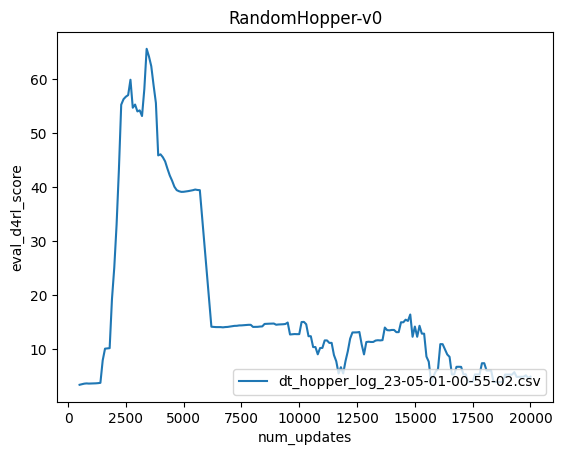

In [ ]:
import numpy as np
import pickle

import pandas as pd
import glob

import matplotlib.pyplot as plt


# env_d4rl_name = 'hopper_log_23-04-13-22-13-25'
env_d4rl_name = 'dt_hopper_log_23-05-01-00-55-02'

log_dir = 'dt_runs/'

x_key = "num_updates"
y_key = "eval_d4rl_score"
y_smoothing_win = 5
plot_avg = False
save_fig = False

if plot_avg:
    save_fig_path = env_d4rl_name + "_avg.png"
else:
    save_fig_path = env_d4rl_name + ".png"


# all_files = glob.glob(log_dir + f'/dt_{env_d4rl_name}*.csv')
all_files = glob.glob("/content/dt_runs/dt_hopper_log_23-05-01-00-55-02.csv")

ax = plt.gca()
# ax.set_title(env_d4rl_name)
ax.set_title('RandomHopper-v0')

if plot_avg:
    name_list = []
    df_list = []
    for filename in all_files:
        frame = pd.read_csv(filename, index_col=None, header=0)
        print(filename, frame.shape)
        frame['y_smooth'] = frame[y_key].rolling(window=y_smoothing_win).mean() 
        df_list.append(frame)
    
    
    df_concat = pd.concat(df_list)
    df_concat_groupby = df_concat.groupby(df_concat.index)
    data_avg = df_concat_groupby.mean()

    data_avg.plot(x=x_key, y='y_smooth', ax=ax)
    
    ax.set_xlabel(x_key)
    ax.set_ylabel(y_key)
    ax.legend(['avg of all runs'], loc='lower right')
    
    if save_fig:
        plt.savefig(save_fig_path)
        
    plt.show()
    
    
else:
    name_list = []
    for filename in all_files:
        frame = pd.read_csv(filename, index_col=None, header=0)
        print(filename, frame.shape)
        frame['y_smooth'] = frame[y_key].rolling(window=y_smoothing_win).mean()
        frame.plot(x=x_key, y='y_smooth', ax=ax)
        name_list.append(filename.split('/')[-1])
    
    ax.set_xlabel(x_key)
    ax.set_ylabel(y_key)
    ax.legend(name_list, loc='lower right')
    
    if save_fig:
        plt.savefig(save_fig_path)
    
    plt.show()
    
